In [1]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *

In [36]:
# Load fluxes
E_res = 10e-3
E_max = 20.0
nfine = 10
nE_bins = 500
Ei,E_bins = EnergyBins(E_res,E_max,nfine,nE_bins)
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic())

# Binned photon number tables
nm = 500
m_vals = logspace(-4.1,log10(5.1e-1),nm)

print('Flux0')
R_tab_0,R0_0 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_0,res_on=True)
print('Flux1')
R_tab_1,R0_1 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_1,res_on=True)

Flux0
Flux1


In [37]:

m_DL_vals = logspace(-4,log10(5e-1),1000)

# IAXO sensitivity
IAXO = ConstantObsNumberLine(7,m_DL_vals,m_vals,R_tab_0) # Primakoff 
IAXO1 = ConstantObsNumberLine(7,m_DL_vals,m_vals,R_tab_0+R_tab_1) # Primakoff+Plasmon
IAXO_m = MassDiscoveryLimit_Simple(m_vals,R_tab_0,R0_0,m_DL_vals) # Primakoff
IAXO_m1 = MassDiscoveryLimit_Simple(m_vals,R_tab_0+R_tab_1,R0_0+R0_1,m_DL_vals) # Primakoff+Plasmon


../src/Like.py:212: RuntimeWarning: invalid value encountered in double_scalars
  DL[im] = 1e-10*(9.0/sum(2*N*log(N/(D*N0))))**0.25


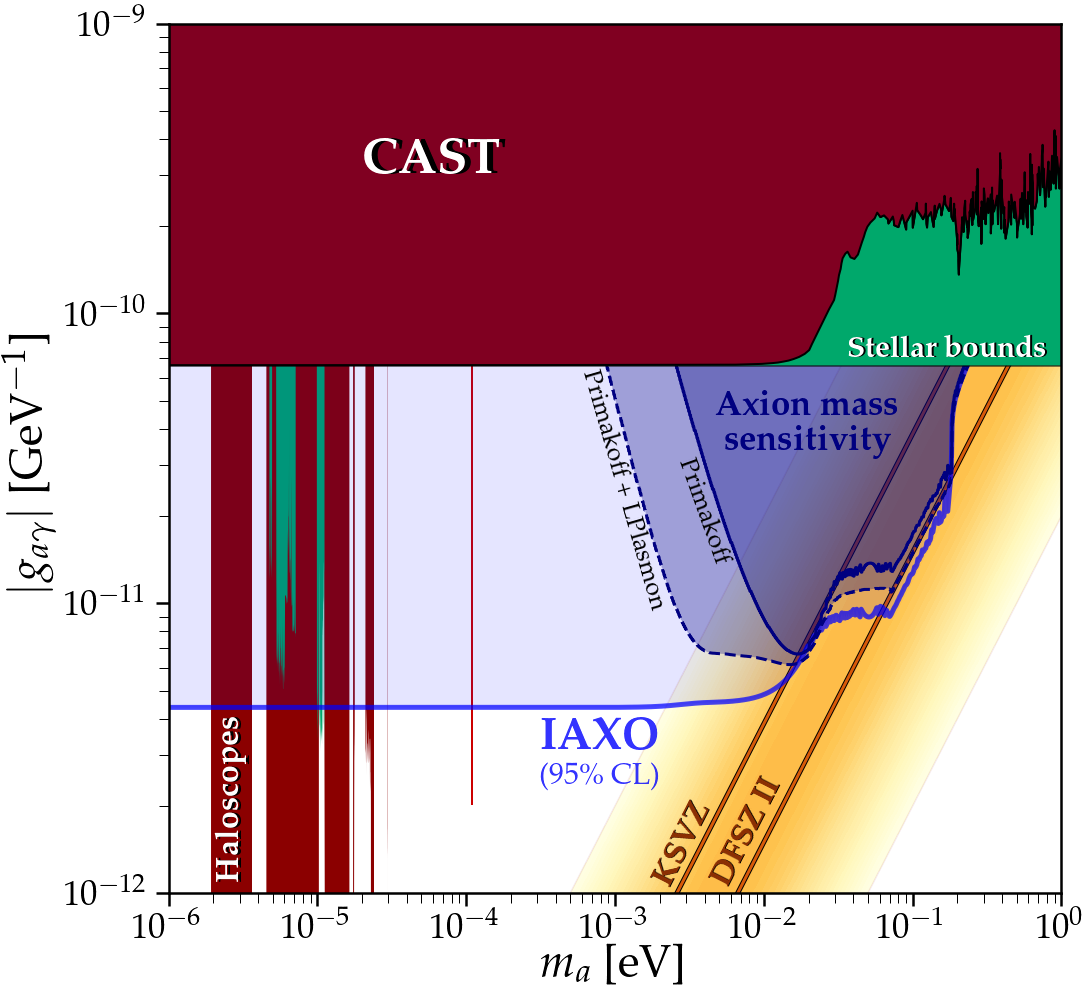

In [72]:
fig,ax = AxionPlotSetup()


IAXO_sens_col = 'blue'
IAXO_msens_col = 'navy'

plt.plot(concatenate(([1e-7],m_DL_vals)),concatenate(([IAXO1[0]],IAXO1)),lw=5,color=IAXO_sens_col,zorder=0.12,alpha=0.7)
plt.fill_between(concatenate(([1e-7],m_DL_vals)),concatenate(([IAXO1[0]],IAXO1)),y2=1,lw=3,color=IAXO_sens_col,zorder=0.12,alpha=0.1)
text = plt.gcf().text(0.50,0.25,r'{\bf IAXO}',fontsize=45,color=IAXO_sens_col,alpha=0.8,ha='center')
plt.gcf().text(0.50,0.22,r'(95\% CL)',fontsize=30,color=IAXO_sens_col,alpha=0.8,ha='center')

plt.fill_between(m_DL_vals,IAXO_m,y2=1,color=IAXO_msens_col,lw=3,zorder=0.12,alpha=0.3)
plt.fill_between(m_DL_vals,IAXO_m1,y2=1,color=IAXO_msens_col,lw=0,zorder=0.12,alpha=0.3)
plt.plot(m_DL_vals,IAXO_m,'-',color=IAXO_msens_col,lw=3,zorder=0.12)
plt.plot(m_DL_vals,IAXO_m1,'--',color=IAXO_msens_col,lw=3,zorder=0.12)

plt.gcf().text(0.68,0.54,r'{\bf \quad Axion mass}',fontsize=35,color=IAXO_msens_col,ha='center')
plt.gcf().text(0.68,0.54-0.03,r'{\bf sensitivity}',fontsize=35,color=IAXO_msens_col,ha='center')
plt.gcf().text(0.60,0.41,r'Primakoff',rotation=-70.5,fontsize=25,color='k',rotation_mode='anchor',ha='right')
plt.gcf().text(0.544,0.37,r'Primakoff + LPlasmon',rotation=-74,fontsize=25,color='k',rotation_mode='anchor',ha='right')

MySaveFig(fig,'IAXO_mass_sensitivity')